In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

random_state = 94922767
np.random.seed(random_state)

In [46]:
url = '../data/regression_example.csv'
df0 = pd.read_csv(url)
df0.head()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


In [47]:
df0.describe()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


In [48]:
# rows with missing values
df0.shape[0]-df0.dropna().shape[0]

273

In [49]:
df = df0.drop('idx', axis=1).dropna().copy()
print("Shape of the final dataset {} rows and {} columns".format(df.shape[0],df.shape[1]))

Shape of the final dataset 570 rows and 9 columns


In [50]:
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,response
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


In [51]:
df.describe()

,F0,F1,F2,F3,F4,F5,F6,F7,response
count,570.000000,570.000000,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000
mean,-0.021285,0.022035,-0.092971,9.437022e-01,-0.092569,0.070721,-0.018369,-0.009618,2.207191
std,1.056384,0.992666,0.990697,1.296685e+00,1.071491,0.973972,1.010638,0.961072,113.938497
min,-3.271229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.687516,-2.773158,-318.105611
25%,-0.735660,-0.617422,-0.697073,9.000558e-02,-0.789596,-0.585211,-0.690098,-0.640285,-73.510375
50%,-0.009715,0.033232,-0.082978,4.626319e-01,-0.099779,0.096024,-0.009963,-0.057067,-3.669460
75%,0.665631,0.701594,0.508181,1.276793e+00,0.612308,0.710788,0.638996,0.655179,74.181279
max,3.043062,2.378251,2.925432,9.200073e+00,3.024952,2.970807,2.719574,3.000174,422.794685


In [52]:
target='response'
X = df.drop(target,axis=1)
y = df[target]

In [53]:
ncols=3
import math
nrows = math.ceil(X.shape[1]/ncols)
figwidth = ncols*7
figheigth = nrows*5

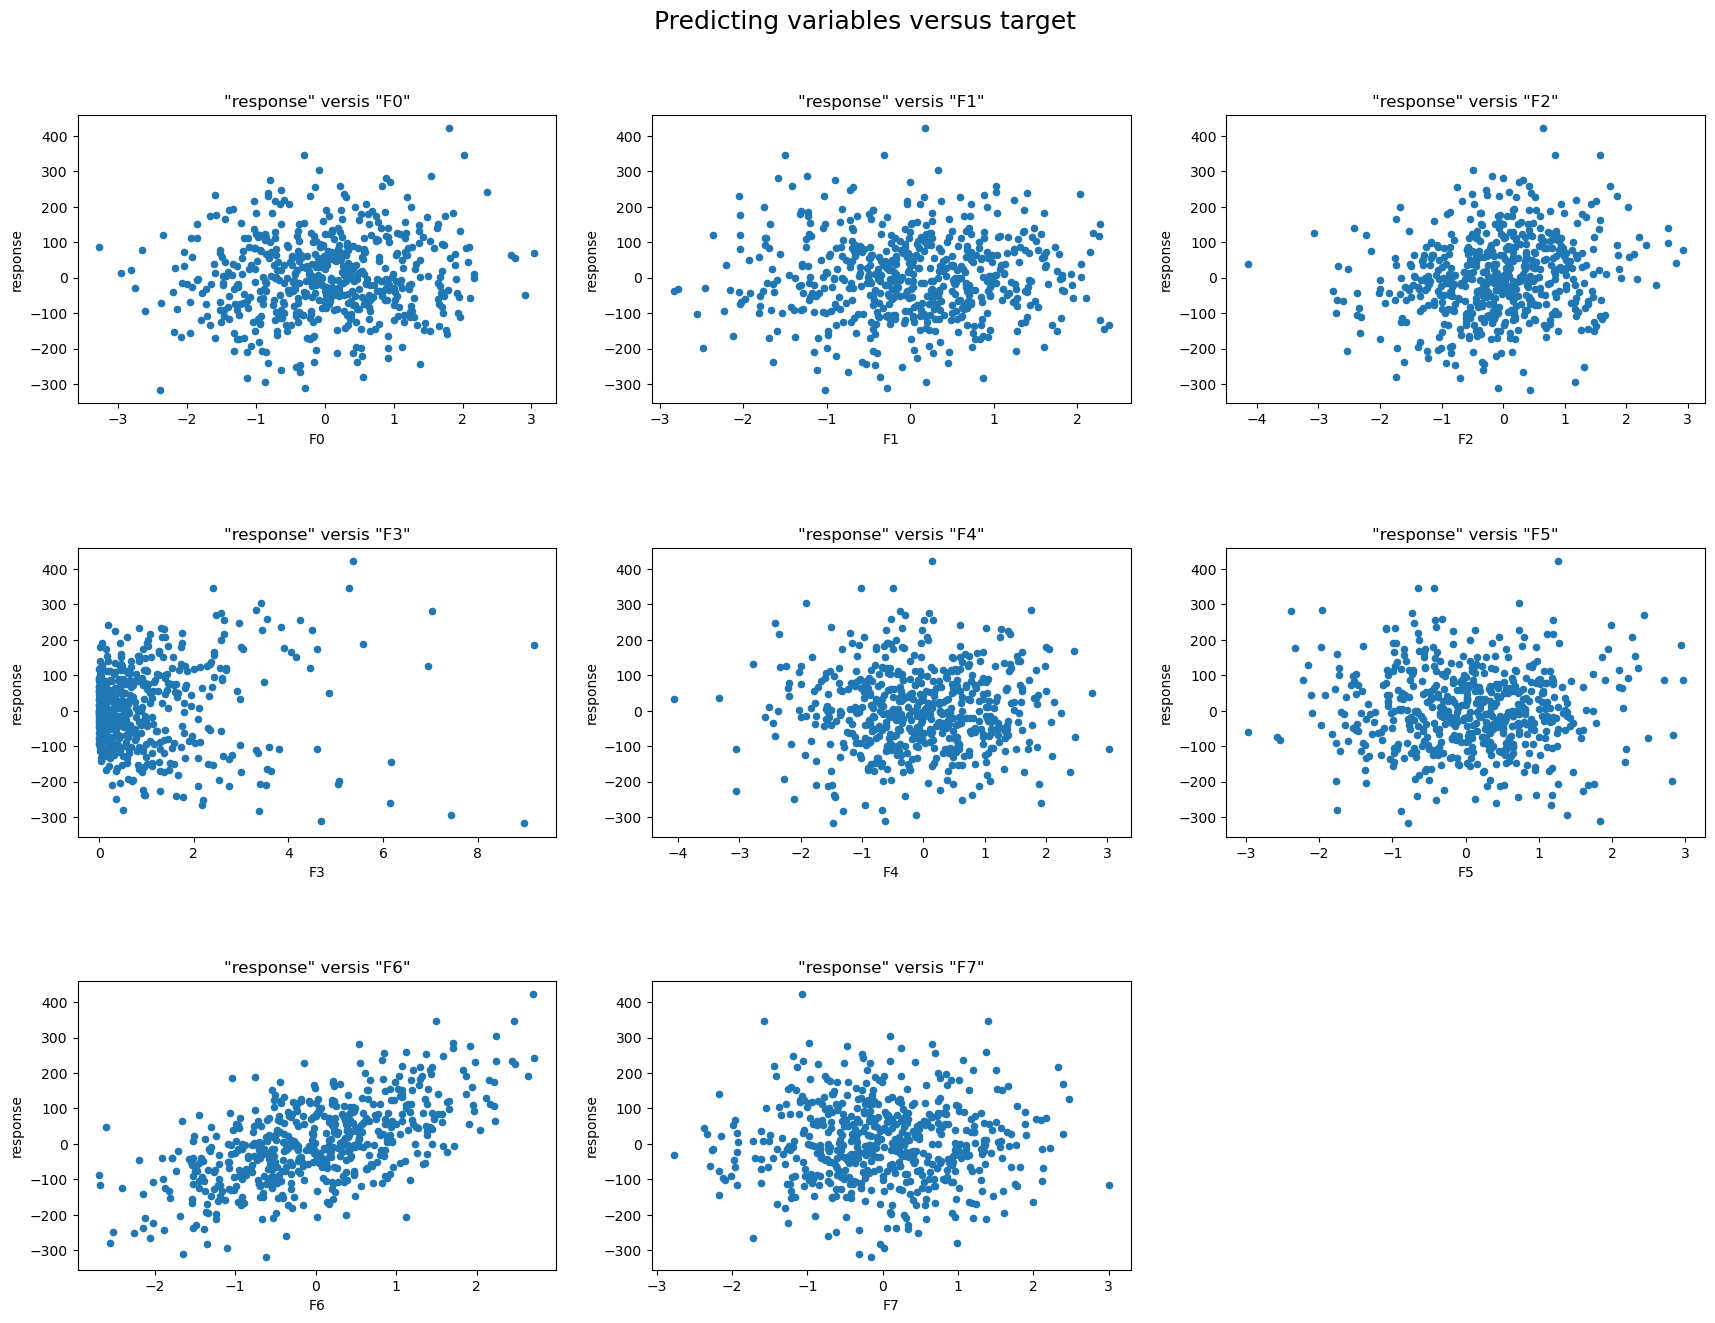

In [54]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figwidth,figheigth))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Predicting variables versus target", fontsize=18, y=0.95)

axs_flat = axs.ravel()

for c, ax in zip(X.columns, axs_flat):
    df.sort_values(by=c).plot.scatter(x=c, y=target
                                 , title=f'"{target}" versis "{c}"'
                                 , ax = ax
                                )

for j in range(len(X.columns), len(axs_flat)):
    fig.delaxes(axs_flat[j])


<Axes: >

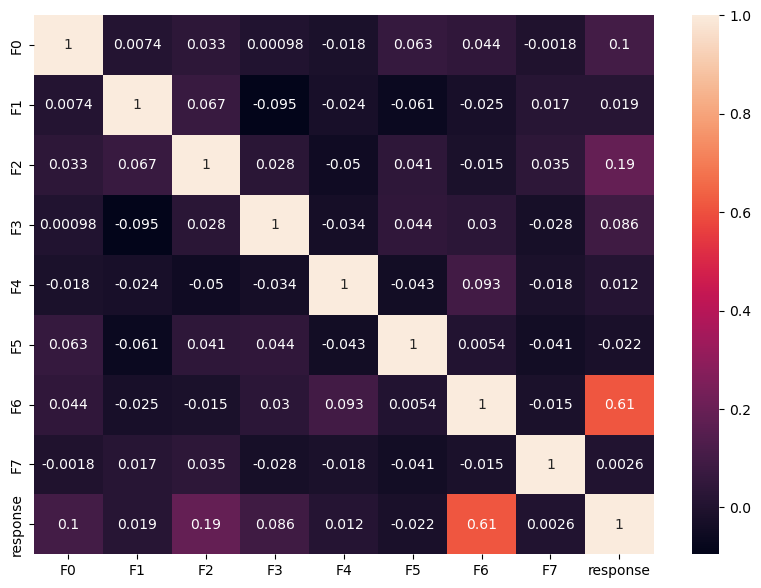

In [55]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state, train_size=0.7 )
print(f'train size {X_train.shape[0]}, test size {X_test.shape[0]}')

train size 399, test size 171


In [57]:
pred_var = 'F6'
X_train_r = X_train[pred_var].values.reshape(-1,1)
X_test_r = X_test[pred_var].values.reshape(-1,1)

results = pd.DataFrame(columns=['Model','RMSE','R_square'])


In [58]:
from sklearn.linear_model import LinearRegression

linear_uni = LinearRegression()
linear_uni.fit(X_train_r,y_train)

y_train_pred_uni = linear_uni.predict(X_train_r)
y_test_pred_uni = linear_uni.predict(X_test_r)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

coeff_uni = linear_uni.coef_[0]
intercept_uni = linear_uni.intercept_ #Bias

rmse_uni = mean_squared_error(y_test, y_test_pred_uni)
r2_uni = r2_score(y_test, y_test_pred_uni)

results.loc[len(results)] = [f'Linear Univariate on {pred_var}',rmse_uni, r2_uni]

In [60]:
from sklearn.linear_model import LinearRegression

linear_multi = LinearRegression()
linear_multi.fit(X_train,y_train)

y_test_pred_multi = linear_multi.predict(X_test)

# Show the coefficients of the predicting variables
pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_multi.coef_})

,Variable,Coefficient
0,F0,9.225329
1,F1,2.794846
2,F2,21.766171
3,F3,3.299594
4,F4,-5.532386
5,F5,-6.002884
6,F6,72.949625
7,F7,-2.675824


In [61]:
rmse_multi = mean_squared_error(y_test, y_test_pred_multi)
r2_multi = r2_score(y_test,y_test_pred_multi)

results.loc[len(results)] = [f'Linear Multivariate', rmse_multi, r2_multi]



In [62]:
results

,Model,RMSE,R_square
0,Linear Univariate on F6,7245.711321,0.338477
1,Linear Multivariate,6577.886025,0.399448


In [63]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt = DecisionTreeRegressor(random_state=random_state)

dt.fit(X_train,y_train)
max_depth = dt.tree_.max_depth
print("The maximum depth of the full Decision Tree Regressor is {}".format(max_depth))

The maximum depth of the full Decision Tree Regressor is 22


In [69]:
from sklearn.model_selection import GridSearchCV

paramGrid = {'max_depth':[*range(1,max_depth+1)]}

dt_gscv = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=random_state),
    param_grid=paramGrid,
    scoring='neg_mean_squared_error'
)

dt_gscv.fit(X_train,y_train)
dt_best = dt_gscv.best_estimator_
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 2


In [70]:
y_test_pred_dt = dt_best.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_test_pred_dt)

print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))
results.loc[len(results)] = ['Decision Tree Regressor', rmse_dt, np.nan]

Decision Tree Regression - RMSE = 8068.93


[Text(0.5, 0.8333333333333334, 'F6 <= 0.493\nsquared_error = 13809.026\nsamples = 399\nvalue = 0.479'),
 Text(0.25, 0.5, 'F6 <= -1.071\nsquared_error = 9807.563\nsamples = 282\nvalue = -38.248'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 8030.323\nsamples = 57\nvalue = -115.58'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8359.033\nsamples = 225\nvalue = -18.658'),
 Text(0.75, 0.5, 'F6 <= 1.68\nsquared_error = 11125.64\nsamples = 117\nvalue = 93.823'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8971.137\nsamples = 102\nvalue = 76.235'),
 Text(0.875, 0.16666666666666666, 'squared_error = 9369.573\nsamples = 15\nvalue = 213.419')]

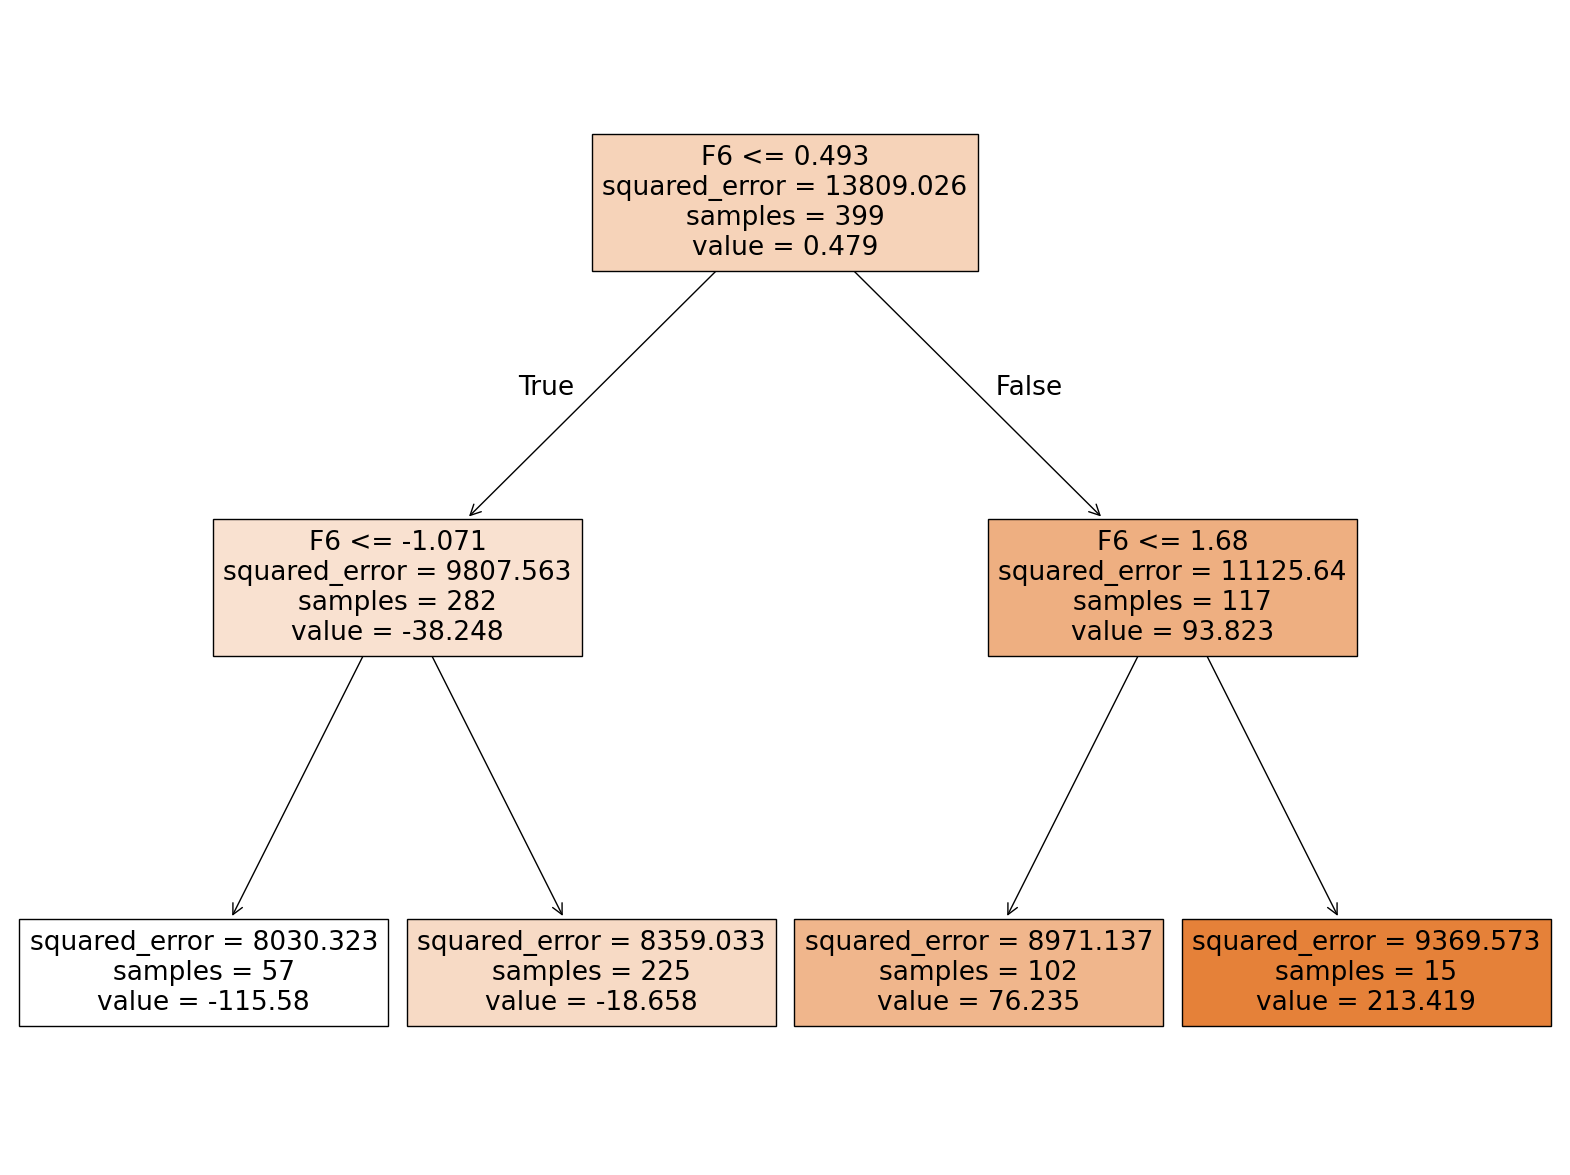

In [72]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize = (20,15))
plot_tree(dt_best,
          feature_names=X.columns.to_list(),
          filled=True
          )

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=random_state)

param_grid_rf = {'max_depth': list(range(1,max_depth))}

rf_gscv = GridSearchCV(
    rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error'
)

rf_gscv.fit(X_train,y_train)

rf = rf_gscv.best_estimator_

In [74]:
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 3


In [75]:
y_test_pred_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test,y_test_pred_rf)
print("Random Forest Regression - RMSE = {:.2f}".format(rmse_rf))

Random Forest Regression - RMSE = 7174.30


In [76]:
results.loc[len(results)] = ['Random Forest Regressor', rmse_rf, np.nan]

In [77]:
df_test_sorted=X_test
df_test_sorted['y_pred_dt']=y_test_pred_dt
df_test_sorted['y_pred_multi']=y_test_pred_multi
df_test_sorted['y_pred_uni']=y_test_pred_uni
df_test_sorted['y_pred_rf']=y_test_pred_rf
df_test_sorted[target]=y_test
df_test_sorted = df_test_sorted.sort_values(by=pred_var)

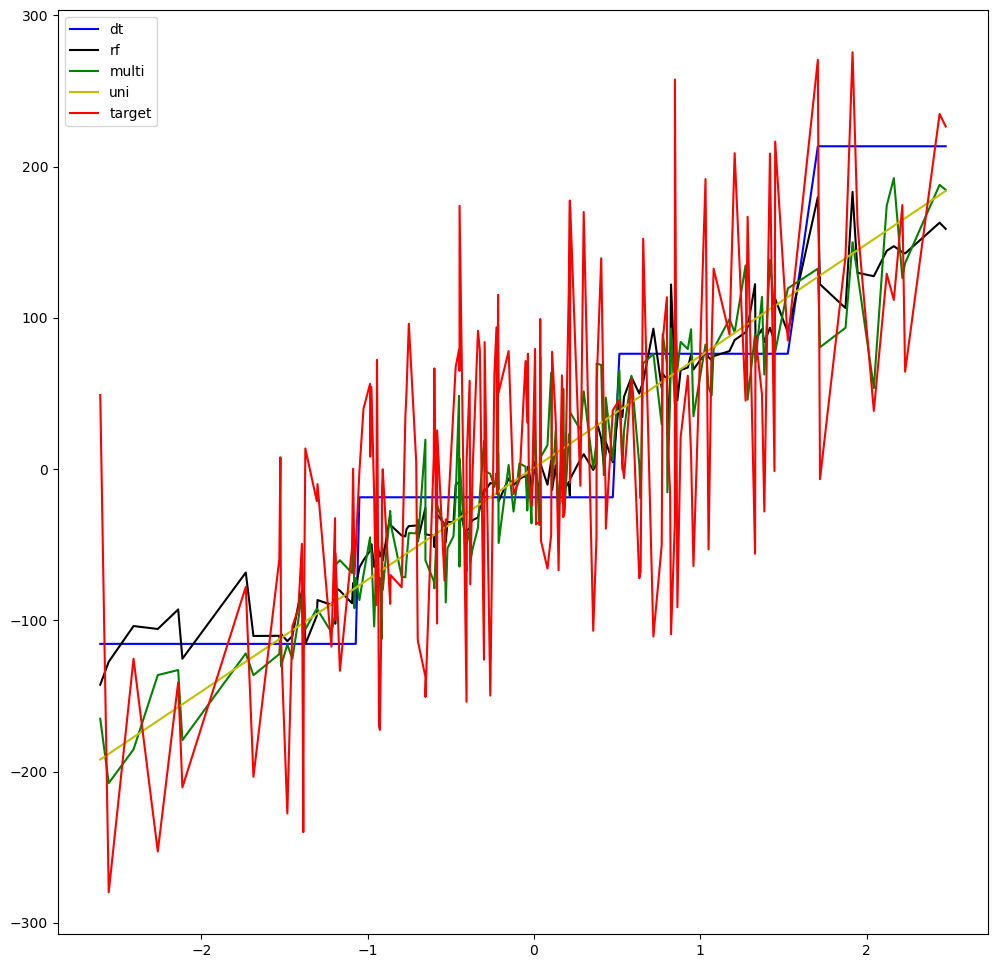

In [78]:
plt.figure(figsize=(12,12))
plt.plot(df_test_sorted[pred_var],df_test_sorted['y_pred_dt'], c='b');
plt.plot(df_test_sorted[pred_var],df_test_sorted['y_pred_rf'], c='k');
plt.plot(df_test_sorted[pred_var],df_test_sorted['y_pred_multi'], c='g');
plt.plot(df_test_sorted[pred_var],df_test_sorted['y_pred_uni'], c='y');
plt.plot(df_test_sorted[pred_var],df_test_sorted[target], c='r');
plt.legend(labels=['dt','rf','multi','uni','target'])
plt.show()

In [79]:
results.style.format(precision=3)

,Model,RMSE,R_square
0,Linear Univariate on F6,7245.711,0.338
1,Linear Multivariate,6577.886,0.399
2,Decision Tree Regressor,8068.927,nan
3,Random Forest Regressor,7174.299,nan
